INSAID DataScience Internship
1. Data Cleaning:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Fraud.csv")

Checking for NULL values:

In [3]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no NULL values. Now we have to convert other data types to "int" 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Converting Features:
The columns "type", "nameOrig", "nameDest" are in object data type. We have to convert them to numerical data type.

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df.type=label.fit_transform(df.type)
df.nameOrig=label.fit_transform(df.nameOrig)
df.nameDest=label.fit_transform(df.nameDest)

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


All the categorical features are converted to numerical data type

Outlier detection

Outlier detection can be visually done using a box plot

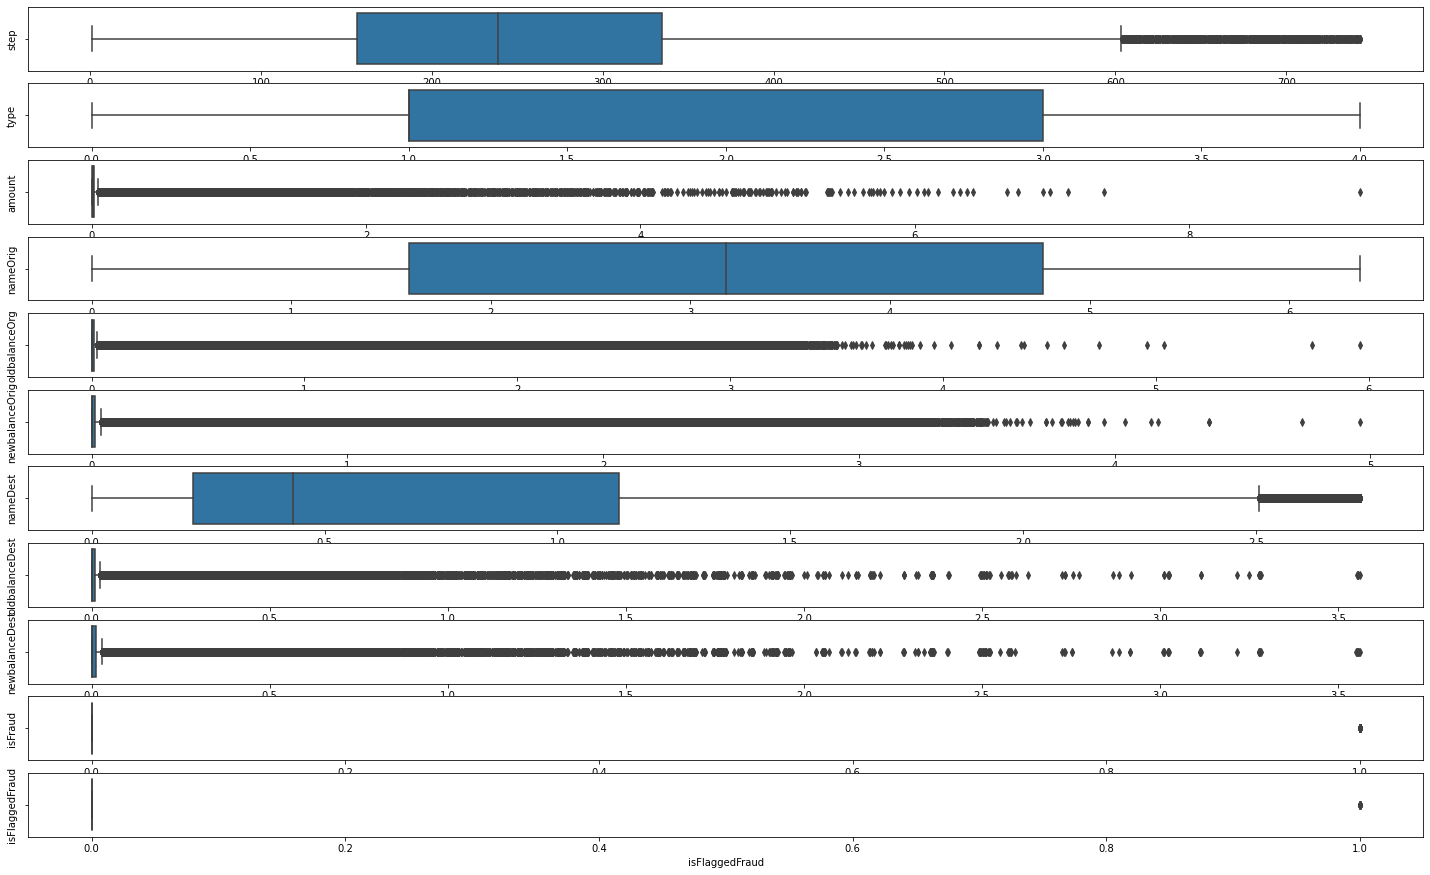

In [9]:
box=df[['step', 'type', 'amount', 'nameOrig', 
          'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']]
plt.figure(figsize=(25,35), facecolor='white')
plotnumber = 1

for column in box:
    if plotnumber<=25 :     
        ax = plt.subplot(25,1,plotnumber)
        sns.boxplot(x=box[column])
        plt.ylabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

There are many outliers in the attributes in amount, oldbalance, newbalance, oldbalancedest, newbalancedest,

Feature selection:
By calculating the correlation coefficient


In [10]:
X=df.drop('isFraud',axis=1)
y=df.isFraud.values

In [11]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0


In [12]:
y

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [13]:
corr_matrix = df.corr()
corr_matrix["isFraud"].sort_values(ascending=False)


isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
type              0.020833
oldbalanceOrg     0.010154
newbalanceDest    0.000535
nameOrig         -0.000464
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
nameDest         -0.021963
Name: isFraud, dtype: float64

The attributes nameOrig,oldbalanceDest,newbalanceOrig,nameDest have negative correlation hence they are removed.

In [14]:
X=X.drop(["nameOrig","oldbalanceDest","newbalanceOrig","nameDest"],axis=1)

Classification model:
Decision tree is used

In [15]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,170136.0,0.0,0
1,1,3,1864.28,21249.0,0.0,0
2,1,4,181.00,181.0,0.0,0
3,1,1,181.00,181.0,0.0,0
4,1,3,11668.14,41554.0,0.0,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [18]:
model.fit(X_train,y_train)

LogisticRegression()

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)

In [21]:
print("Training data Accuracy:")
print( training_data_accuracy)

Training data Accuracy:
0.9978521875759178


In [22]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)

In [23]:
print("Test data Accuracy:")
print( test_data_accuracy)

Test data Accuracy:
0.9978897582023338


1. Data cleaning including missing values, outliers and multi-collinearity.
There was no missing values. There are many outliers in the attributes in amount, oldbalance, newbalance, oldbalancedest, newbalancedest. 
2. Describe your fraud detection model in elaboration.
I have implemented the fraud detection model using Logistic Regression.
3. How did you select variables to be included in the model?
By calculating the correlation co-efficient.The variables that had a negative correlation were removed.The attributes nameOrig,oldbalanceDest,newbalanceOrig,nameDest have negative correlation hence they are removed.
4. Demonstrate the performance of the model by using best set of tools.
Calculated the test and train data accuracy to evaluate the performance
5. What are the key factors that predict fraudulent customer?
Amount and the step attributes are the key factors that predict a fradulent customer.
6. Do these factors make sense? If yes, How? If not, How not?
YES, If the amount involved in transaction is huge, it could be a fraudulent transaction.Steps denotes the unit of time, as the time increases it denotes a fraudulent transaction
7. What kind of prevention should be adopted while company update its infrastructure?
The transaction must be stopped if the:
1:Amount involved is huge
2:Takes more time
8. Assuming these actions have been implemented, how would you determine if they work?
If they work, then the number of fraudulent transaction would decline